In [185]:
# import packages

import pandas as pd
import numpy as np
import datetime 
import math as mat
import time 
from datetime import timedelta
import matplotlib.pyplot as plt
import re 

In [3]:
# Import the csv file
accre_df=pd.read_csv('Data/july-2017-thru-june-2018.txt',sep="|",nrows=1000000)


In [5]:
# see what the data looks like
accre_df.head()

,JobID,JobIDRaw,Cluster,Partition,Account,Group,GID,User,UID,Submit,...,State,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,JobName
0,15806649,15806649,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1085,WOODWARD_TCP-x-228324-x-228324-x-301-x-Multi_A...
1,15806664,15806664,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1099,WOODWARD_TCP-x-115174-x-115174-x-301-x-Multi_A...
2,15806670,15806670,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1126,WOODWARD_TCP-x-215607-x-215607-x-301-x-Multi_A...
3,15806671,15806671,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp230,WOODWARD_TCP-x-116214-x-116214-x-1701-x-Multi_...
4,15811617,15811617,accre,production,cms_samtest,cms_samtest,59297,uscms010,NaN,2017-07-01T05:00:00,...,COMPLETED,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,bl_aa7c22e04f21


In [6]:
# check elapsed data
accre_df['Elapsed'].head(6)

0    1-01:05:21
1      23:51:47
2    1-01:59:51
3    1-08:02:20
4      00:00:10
5      00:03:18
Name: Elapsed, dtype: object


## Elapsed time is equal to difference between end and start time

# convert the start, end and submit time from str to datetime format to calculate job duration

In [7]:
accre_df['Submit']=pd.to_datetime(accre_df['Submit'])

In [8]:
accre_df['Start']=pd.to_datetime(accre_df['Start'])

In [9]:
accre_df['End']=pd.to_datetime(accre_df['End'])

# calculate Elaspsed time for jobs

In [10]:
# replace elapsed time column with the calculated elapsed time.
accre_df['Elapsed']=accre_df['End']-accre_df['Start']

In [11]:
accre_df.shape

(1000000, 25)

In [12]:
accre_df.head()

,JobID,JobIDRaw,Cluster,Partition,Account,Group,GID,User,UID,Submit,...,State,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,JobName
0,15806649,15806649,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02 00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1085,WOODWARD_TCP-x-228324-x-228324-x-301-x-Multi_A...
1,15806664,15806664,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02 00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1099,WOODWARD_TCP-x-115174-x-115174-x-301-x-Multi_A...
2,15806670,15806670,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02 00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1126,WOODWARD_TCP-x-215607-x-215607-x-301-x-Multi_A...
3,15806671,15806671,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02 00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp230,WOODWARD_TCP-x-116214-x-116214-x-1701-x-Multi_...
4,15811617,15811617,accre,production,cms_samtest,cms_samtest,59297,uscms010,NaN,2017-07-01 05:00:00,...,COMPLETED,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,bl_aa7c22e04f21


accre_df2.head()

In [13]:
# check data type of sumbit column
accre_df['Submit'].head()

0   2017-07-02 00:40:58
1   2017-07-02 00:40:58
2   2017-07-02 00:40:58
3   2017-07-02 00:40:58
4   2017-07-01 05:00:00
Name: Submit, dtype: datetime64[ns]

# check data type of Elapsed column

In [14]:
accre_df['Elapsed'].head()




0   1 days 01:05:21
1   0 days 23:51:47
2   1 days 01:59:51
3   1 days 08:02:20
4   0 days 00:00:10
Name: Elapsed, dtype: timedelta64[ns]

In [96]:
# keep only sumbit, user, jobidraw and elapsed time column
accre_select_df=accre_df.loc[:,['Submit','User','JobIDRaw','Elapsed','State']]
accre_select_df.head()


,Submit,User,JobIDRaw,Elapsed,State
0,2017-07-02 00:40:58,masispider,15806649,1 days 01:05:21,COMPLETED
1,2017-07-02 00:40:58,masispider,15806664,0 days 23:51:47,COMPLETED
2,2017-07-02 00:40:58,masispider,15806670,1 days 01:59:51,COMPLETED
3,2017-07-02 00:40:58,masispider,15806671,1 days 08:02:20,COMPLETED
4,2017-07-01 05:00:00,uscms010,15811617,0 days 00:00:10,COMPLETED


# sort the the accre_select_df by Elapsed time and user name in ascending order.

In [144]:
accre_5_minutes_df= accre_select_df[accre_select_df.Elapsed<'0 days 00:05:00']

# keep only submit, user and JobIDRaw columns to use them below

In [145]:
accre_5_minutes=accre_5_minutes_df.loc[:,['Submit','User','JobIDRaw']]

In [146]:
accre_5_minutes.head(10)

,Submit,User,JobIDRaw
4,2017-07-01 05:00:00,uscms010,15811617
5,2017-07-01 05:00:01,autocms,15811618
6,2017-07-01 05:00:02,tuos,15811619
7,2017-07-01 05:00:22,uscms010,15811621
8,2017-07-01 05:01:01,autocms,15811624
9,2017-07-01 05:01:02,tuos,15811625
31,2017-07-01 05:01:26,vuiiscci,15811649
33,2017-07-01 05:01:26,vuiiscci,15811651
34,2017-07-01 05:01:56,uscms010,15811654
35,2017-07-01 05:02:02,autocms,15811655


In [149]:
Failed_jobs=accre_5_minutes_df[accre_5_minutes_df.State=='FAILED']

# group less than 5 minutes jobs into 4 hours range

In [151]:
grouped_by_4h = accre_5_minutes.groupby('User').rolling('4h', on='Submit').JobIDRaw.count()

In [152]:
grouped_by_4h.head(10)

User      Submit             
albertme  2017-07-03 23:15:39    1.0
          2017-07-04 02:59:58    2.0
          2017-07-04 03:04:59    3.0
          2017-07-04 03:10:42    4.0
          2017-07-04 03:16:04    4.0
          2017-07-04 03:34:08    5.0
          2017-07-04 03:38:08    6.0
          2017-07-04 06:03:55    7.0
          2017-07-04 17:09:39    1.0
          2017-07-04 17:12:48    2.0
Name: JobIDRaw, dtype: float64

grouped_by_4h=pd.DataFrame(grouped_by_4h).reset_index


In [153]:
# maximum number of jobs the users run in 4 hour ranges
grouped_by_4h_500= grouped_by_4h.groupby('User').max()
grouped_by_4h_500.head()

User
albertme      7.0
anderkj2      9.0
annisj       20.0
arnoldjr      8.0
autocms     242.0
Name: JobIDRaw, dtype: float64

In [154]:
# users running more than 500 jobs in 4 hours ranges
grouped_by_4h_500=grouped_by_4h_500[grouped_by_4h_500>=500]
grouped_by_4h_500

User
bozhanng        604.0
brockc         1234.0
cakira         7683.0
cmsglidein    11768.0
deik            681.0
fletchs2       7670.0
khancm         2443.0
luchieac       1000.0
marlowb        2862.0
mercalnd       7613.0
msrc            955.0
ozgunka         571.0
schildjs       1109.0
schluedj       1005.0
scholzmb       1046.0
sivleyrm        678.0
sotocs         3697.0
teaguedo       2573.0
tierneje       1041.0
vuiiscci       1072.0
wangj36        1224.0
zhangdk       63331.0
Name: JobIDRaw, dtype: float64

In [155]:
# bar plot for users running more than 500 short jobs within 24

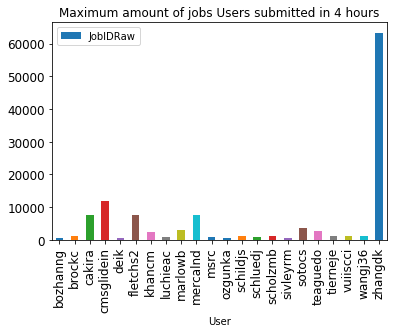

In [156]:
grouped_by_4h_500.plot.bar(title='Maximum amount of jobs Users submitted in 4 hours', legend=True,fontsize=12,figsize=(6,4))

# method 2 to find the  point where the users hit the 500th  jobs

In [157]:
accre_5_minutes['cum_count'] = accre_5_minutes.groupby(['User', pd.Grouper(freq='4H', key='Submit')]).cumcount()

# cumulative counts of  jobs ran in 4 hour ranges

In [158]:

# see top 10 rows
accre_5_minutes.head(10)

,Submit,User,JobIDRaw,cum_count
4,2017-07-01 05:00:00,uscms010,15811617,0
5,2017-07-01 05:00:01,autocms,15811618,0
6,2017-07-01 05:00:02,tuos,15811619,0
7,2017-07-01 05:00:22,uscms010,15811621,1
8,2017-07-01 05:01:01,autocms,15811624,1
9,2017-07-01 05:01:02,tuos,15811625,1
31,2017-07-01 05:01:26,vuiiscci,15811649,0
33,2017-07-01 05:01:26,vuiiscci,15811651,1
34,2017-07-01 05:01:56,uscms010,15811654,2
35,2017-07-01 05:02:02,autocms,15811655,2


# total jobs each user runs 

In [307]:
jobs_in_4h=accre_5_minutes[['User','JobIDRaw']].groupby('User').agg('count').sort_values('JobIDRaw',ascending=False)
jobs_in_4h

,JobIDRaw
User,
zhangdk,220050
cmsglidein,48758
autocms,35786
tuos,31832
uscms010,31326
msrc,28835
fletchs2,16195
cakira,15665
mercalnd,13011


# users running more than 500 jobs with in 4 hours range

In [332]:
# the point of time the users pass 500th jobs and keep adding them.
accre_5_minutes_500=accre_5_minutes[accre_5_minutes.cum_count>=500]

In [333]:
accre_5_minutes_500.head()

,Submit,User,JobIDRaw,cum_count
27714,2017-07-03 21:03:47,fletchs2,15845128,500
27715,2017-07-03 21:03:47,fletchs2,15845129,501
27716,2017-07-03 21:03:47,fletchs2,15845130,502
27717,2017-07-03 21:03:47,fletchs2,15845131,503
27718,2017-07-03 21:03:47,fletchs2,15845132,504


In [334]:
# maximum number of jobs the users run within 4 hour ranges
accre_5_minutes_500.groupby('User').max().sort_values('cum_count',ascending=False)

,Submit,JobIDRaw,cum_count
User,,,
zhangdk,2017-07-25 08:15:18,16704812,75610
mercalnd,2017-07-27 23:47:54,16798657,6512
cmsglidein,2017-07-28 13:17:48,16818357,5220
cakira,2017-07-15 00:33:05,16305703,4592
fletchs2,2017-07-15 02:06:51,16313302,4427
sotocs,2017-07-25 00:15:36,16679818,2497
khancm,2017-07-13 19:54:33,16194253,2442
marlowb,2017-07-24 21:34:20,16672172,2377
teaguedo,2017-07-19 15:55:31,16487087,2106


In [335]:
# maximum number of jobs the users run within 4 hour ranges
accre_5_minutes_500.reset_index().head()

,index,Submit,User,JobIDRaw,cum_count
0,27714,2017-07-03 21:03:47,fletchs2,15845128,500
1,27715,2017-07-03 21:03:47,fletchs2,15845129,501
2,27716,2017-07-03 21:03:47,fletchs2,15845130,502
3,27717,2017-07-03 21:03:47,fletchs2,15845131,503
4,27718,2017-07-03 21:03:47,fletchs2,15845132,504


In [336]:
accre_5_minutes_500.User.unique()

array(['fletchs2', 'mercalnd', 'cmsglidein', 'cakira', 'khancm',
       'zhangdk', 'vuiiscci', 'bozhanng', 'luchieac', 'deik', 'tierneje',
       'wangj36', 'teaguedo', 'schildjs', 'sotocs', 'scholzmb', 'brockc',
       'marlowb', 'sivleyrm', 'msrc', 'schluedj'], dtype=object)

In [337]:
offenders=list(accre_5_minutes_500.User.unique())
offenders

['fletchs2',
 'mercalnd',
 'cmsglidein',
 'cakira',
 'khancm',
 'zhangdk',
 'vuiiscci',
 'bozhanng',
 'luchieac',
 'deik',
 'tierneje',
 'wangj36',
 'teaguedo',
 'schildjs',
 'sotocs',
 'scholzmb',
 'brockc',
 'marlowb',
 'sivleyrm',
 'msrc',
 'schluedj']

# list the most frequent offenders

In [338]:
accre_500_occurence = accre_5_minutes_500[accre_5_minutes_500['cum_count']==500]

In [339]:
prob_offender_count=accre_500_occurence[['User', 'cum_count']].groupby('User').agg('count').sort_values(by ='cum_count', ascending = False)
prob_offender_count = prob_offender_count.reset_index()
prob_offender_count.columns = [['User','short_job_count']]

# number of times the offenders sumbitted too short 500 or more jobs in 4 hour range

In [340]:

prob_offender_count


,User,short_job_count
0,msrc,34
1,cmsglidein,16
2,zhangdk,16
3,fletchs2,8
4,cakira,6
5,brockc,6
6,teaguedo,6
7,mercalnd,5
8,sotocs,4
9,marlowb,4


# data set for offenders

In [341]:

offenders_df=accre_5_minutes_df[accre_5_minutes_df.User.isin(offenders)]

In [342]:
offenders_df.head()

,Submit,User,JobIDRaw,Elapsed,State
31,2017-07-01 05:01:26,vuiiscci,15811649,00:00:00,COMPLETED
33,2017-07-01 05:01:26,vuiiscci,15811651,00:00:00,COMPLETED
837,2017-07-01 07:34:47,sotocs,15812720,00:00:01,COMPLETED
1890,2017-07-01 11:32:07,cmsglidein,15814061,00:00:00,CANCELLED by 29607
2273,2017-07-01 13:24:02,sotocs,15814640,00:00:01,COMPLETED


# assign 1 if the job failed

In [343]:
offenders_df['Failed_job'] = np.where(offenders_df['State']=='FAILED', 1, 0)

C:\Users\fevty\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# number of times the jobs failed per users running less 5 minutes jobs

In [344]:
offenders_Failed=offenders_df[['User','Failed_job']].groupby('User').agg('sum').sort_values('Failed_job',ascending=False)

In [345]:
offenders_Failed.head()

,Failed_job
User,
cmsglidein,22532
vuiiscci,6825
fletchs2,6208
sotocs,5012
mercalnd,4215


In [346]:
offenders_Failed.reset_index()

,User,Failed_job
0,cmsglidein,22532
1,vuiiscci,6825
2,fletchs2,6208
3,sotocs,5012
4,mercalnd,4215
5,teaguedo,1841
6,schluedj,1468
7,luchieac,1022
8,schildjs,965
9,bozhanng,603


# merge count for total jobs less than 5 minutes dataset with count of failed jobs

In [347]:
# reset_index for total_jobs data before merging
total_jobs=jobs_in_4h.reset_index()

In [348]:
offenders_df_1=pd.merge(offenders_Failed,total_jobs,how='outer',on=['User'])

In [349]:
offenders_df_1.head()

,User,Failed_job,JobIDRaw
0,cmsglidein,22532.0,48758
1,vuiiscci,6825.0,9052
2,fletchs2,6208.0,16195
3,sotocs,5012.0,5024
4,mercalnd,4215.0,13011


In [350]:
offenders_df_1['pct_failed']= offenders_df_1['Failed_job']/offenders_df_1['JobIDRaw']*100
offenders_df_1.head()

,User,Failed_job,JobIDRaw,pct_failed
0,cmsglidein,22532.0,48758,46.211904
1,vuiiscci,6825.0,9052,75.397702
2,fletchs2,6208.0,16195,38.332819
3,sotocs,5012.0,5024,99.761146
4,mercalnd,4215.0,13011,32.395665


In [351]:
offenders_df_1.sort_values('pct_failed',ascending=False)

,User,Failed_job,JobIDRaw,pct_failed
9,bozhanng,603.0,604,99.834437
3,sotocs,5012.0,5024,99.761146
6,schluedj,1468.0,1695,86.607670
8,schildjs,965.0,1116,86.469534
1,vuiiscci,6825.0,9052,75.397702
7,luchieac,1022.0,1920,53.229167
0,cmsglidein,22532.0,48758,46.211904
2,fletchs2,6208.0,16195,38.332819
10,sivleyrm,522.0,1466,35.607094
4,mercalnd,4215.0,13011,32.395665


# relationship between number of jobs run by offenders and number of times the times the jobs failed

Text(0,0.5,'Number of times job Failed')

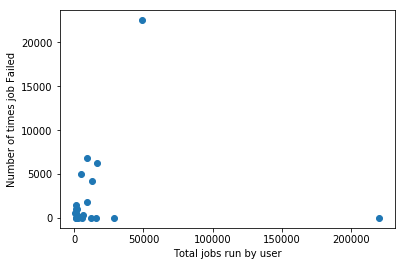

In [352]:
plt.scatter(offenders_df_1.JobIDRaw,offenders_df_1.Failed_job )

plt.xlabel('Total jobs run by user')
plt.ylabel('Number of times job Failed')